In [1]:
import os
import numpy as np
import pandas as pd
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [4]:
csv_file_path = "data.csv"  
image_folder_path = r"C:\Users\Dell\Desktop\data\Xrayimage" 
data = pd.read_csv(csv_file_path)

In [5]:
images = []
labels = []

In [1]:
# ERROR SHOW BELOW IS NOT AN ERROR , THESE ARE THE IMAGES WE HAVE SAPERATED FOR TESTING OF MODEL 

In [6]:
for index, row in data.iterrows():
    image_path = os.path.join(image_folder_path, str(row['imageNo']) + '.jpg')
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if image is not None:
            image = cv2.resize(image, (224, 224))  # Resize image to 128x128
            images.append(image)
            labels.append(row['rascore'])
        else:
            print(f"Error: Unable to read image {image_path}")
    except Exception as e:
        print(f"Error: Exception occurred while loading image {image_path}: {e}")

Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\19936.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\23005.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\23151.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\35326.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\38561.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\40056.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\77693.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\79181.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\143163.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\306579.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\369973.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\398748.jpg
Error: Unable to read image C:\Users\Dell\Desktop\data\Xrayimage\404431.jpg
Error: Unable to rea

In [7]:
images = np.array(images, dtype="float32")
labels = np.array(labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(3040, 224, 224)

In [10]:
y_train.shape

(3040,)

In [11]:
X_test.shape

(760, 224, 224)

In [12]:
labels_categories = []
for label in labels:
    if label <= 5:
        labels_categories.append(0)  # Low RA Severity
    elif 5 < label <= 10:
        labels_categories.append(1)  # Moderate RA Severity
    else:
        labels_categories.append(2)  # High RA Severity

In [13]:
labels_categories = np.array(labels_categories)

In [14]:
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check the number of elements in each category
label_counter = Counter(labels_categories)
print("Number of elements in each category:", label_counter)

Number of elements in each category: Counter({2: 2533, 0: 790, 1: 477})


In [15]:
from collections import Counter
import numpy as np

In [16]:
# Check the number of elements in each category
label_counter = Counter(labels_categories)
print("Number of elements in each category:", label_counter)

Number of elements in each category: Counter({2: 2533, 0: 790, 1: 477})


In [17]:

# Determine the desired number of samples per class
desired_samples = max(label_counter.values())

In [18]:
oversampled_images = []
oversampled_labels = []

In [19]:
for label in label_counter:
    # Find indices of samples belonging to the current class
    indices = [idx for idx, val in enumerate(labels_categories) if val == label]
    
    # Calculate the number of additional samples needed for the current class
    additional_samples_needed = desired_samples - label_counter[label]
    
    # Randomly select additional_samples_needed indices from the current class with replacement
    selected_indices = np.random.choice(indices, size=additional_samples_needed, replace=True)
    
    # Append selected samples to the oversampled data lists
    oversampled_images.extend(images[selected_indices])
    oversampled_labels.extend(labels_categories[selected_indices])

In [20]:
# Concatenate original data with oversampled data
oversampled_images = np.concatenate((images, oversampled_images), axis=0)
oversampled_labels = np.concatenate((labels_categories, oversampled_labels), axis=0)

In [21]:
oversampled_label_counter = Counter(oversampled_labels)
print("Number of elements in each category after oversampling:", oversampled_label_counter)

Number of elements in each category after oversampling: Counter({0: 2533, 2: 2533, 1: 2533})


In [22]:
import numpy as np

# Assuming your grayscale images have shape (None, 224, 224)
# Add a channel dimension to the images
oversampled_images = np.expand_dims(oversampled_images, axis=-1)

# Now, grayscale_images_with_channels will have a shape of (None, 224, 224, 1)
# which can be used as input to the model


In [23]:
import numpy as np

# Assuming grayscale_images is your grayscale image data with shape (None, 224, 224, 1)
# Convert grayscale images to RGB format by replicating the single channel along the depth dimension
oversampled_images = np.repeat(oversampled_images , 3, axis=-1)

# Now, rgb_images will have a shape of (None, 224, 224, 3) and can be used as input to the model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(oversampled_images,oversampled_labels, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(6079, 224, 224, 3)

In [26]:
y_train.shape

(6079,)

In [27]:
from tensorflow.keras import layers, models

In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224 ,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for low, moderate, and high RA severity
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [31]:
history = model.fit(X_train,y_train , epochs= 20 , batch_size=32, validation_split=0.2)

Epoch 1/20
152/152 [==============================] - 98s 634ms/step - loss: 16.4584 - accuracy: 0.5131 - val_loss: 0.8858 - val_accuracy: 0.6217
Epoch 2/20
152/152 [==============================] - 100s 655ms/step - loss: 0.5194 - accuracy: 0.7964 - val_loss: 0.5845 - val_accuracy: 0.7804
Epoch 3/20
152/152 [==============================] - 98s 648ms/step - loss: 0.1645 - accuracy: 0.9451 - val_loss: 0.6338 - val_accuracy: 0.8273
Epoch 4/20
152/152 [==============================] - 95s 624ms/step - loss: 0.0591 - accuracy: 0.9840 - val_loss: 0.6142 - val_accuracy: 0.8709
Epoch 5/20
152/152 [==============================] - 96s 630ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.8373 - val_accuracy: 0.8602
Epoch 6/20
152/152 [==============================] - 97s 640ms/step - loss: 0.0115 - accuracy: 0.9973 - val_loss: 0.9573 - val_accuracy: 0.8396
Epoch 7/20
152/152 [==============================] - 95s 627ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.9223 - val_

In [32]:
import matplotlib.pyplot as plt

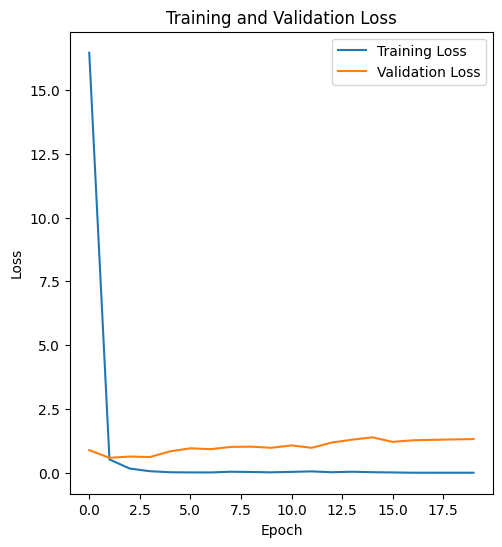

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

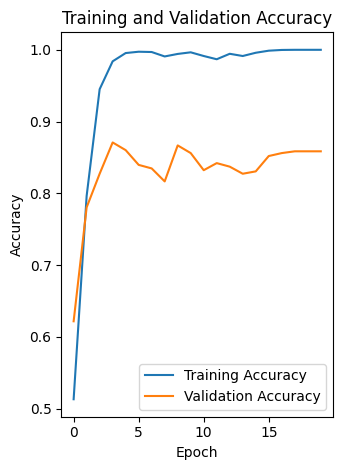

In [34]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

48/48 - 7s - loss: 1.3718 - accuracy: 0.8559 - 7s/epoch - 142ms/step

Test accuracy: 0.8559210300445557


In [36]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

48/48 [==============================] - 7s 149ms/step


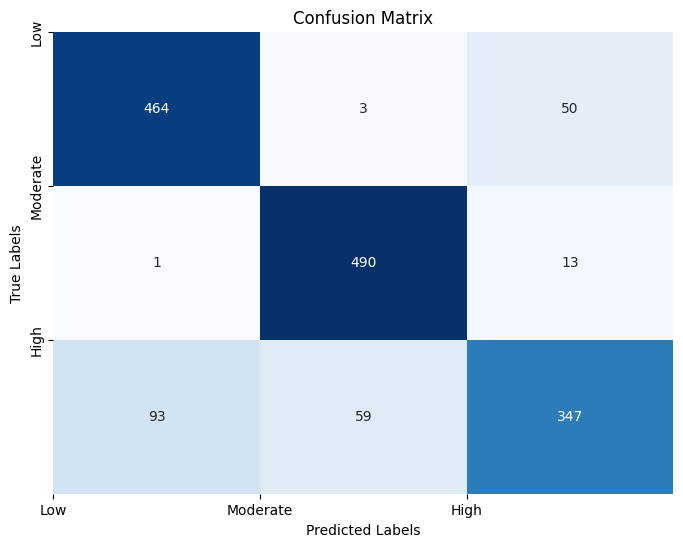

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Moderate', 'High'])
plt.yticks(ticks=[0, 1, 2], labels=['Low', 'Moderate', 'High'])
plt.show()

In [38]:
# Assuming you have your training and testing data ready, and the model is trained

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)




48/48 [==============================] - 7s 148ms/step - loss: 1.3718 - accuracy: 0.8559
Test Loss: 1.37184739112854
Test Accuracy: 0.8559210300445557


In [39]:
# Save the model to disk
model.save("cnn_model.h5")

In [40]:
from tensorflow.keras.models import load_model

In [41]:
 loaded_model =  load_model("cnn_model.h5")

In [42]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# # Load the image
# img_path = r'C:\Users\Dell\Desktop\data\Xrayimage\445062.jpg'
# img = image.load_img(img_path, target_size=( 224, 224, 3))  
# img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# # Preprocess the image
# img_array /= 255.0  # Normalize pixel values

# # Use the loaded model to make predictions on the preprocessed image
# predictions = loaded_model.predict(img_array)

# # Assuming 'actual_label' is the actual label or class of the image
# # Convert the predicted probabilities into a single class prediction
# predicted_label = np.argmax(predictions[0])

# # Print the predicted label and actual label
# print("Predicted Label:", predicted_label)
# # print("Actual Label:", actual_label)


#TESTING MODEL ON NEW DATA 

In [43]:
import os
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder

# Path to the directory containing the new data
csv_file_path = "new_data.csv"  
image_folder_path = r"C:\Users\Dell\Desktop\data\CHECK"

# Read the CSV file containing image paths and labels
data = pd.read_csv(csv_file_path)



# List to store images and corresponding labels
images = []
labels = []

# Iterate over the rows in the data DataFrame
for index, row in data.iterrows():
    image_path = os.path.join(image_folder_path, str(row['imageNo']) + '.jpg')
    try:
        # Load and preprocess the image
        image = cv2.imread(image_path) 
        if image is not None:
            image = cv2.resize(image, (224, 224))  # Resize image to (224, 224)
            image = img_to_array(image) / 255.0    # Normalize pixel values
            images.append(image)
            labels.append(row['rascore'])
        else:
            print(f"Error: Unable to read image {image_path}")
    except Exception as e:
        print(f"Error: Exception occurred while loading image {image_path}: {e}")

# Convert the lists of images and labels to NumPy arrays
images = np.array(images, dtype="float32")
labels = np.array(labels)

# Ensure that images have the correct shape
images = images.reshape(images.shape[0], 224, 224, 3)

# Categorize the labels into three categories based on their values
label_encoder = LabelEncoder()
labels_categories = label_encoder.fit_transform(pd.cut(labels, bins=[-np.inf, 5, 10, np.inf], labels=[0, 1, 2]))

# Evaluate the model on the new data
test_loss, test_acc = model.evaluate(images, labels_categories, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 6.8972 - accuracy: 0.7222 - 280ms/epoch - 280ms/step

Test accuracy: 0.7222222089767456
